# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification type of learning problem. Because we have only two discrete lables, graduated or abandoned. A student cannot be .23 graduated, or 4.5 graduated, she/he can either be graduated or not.  

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

print student_data

Student data read successfully!
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15 

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
print sum(student_data['passed']=='yes')

265


In [3]:
print student_data.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')


In [4]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns[:-1])

# TODO: Calculate passing students
n_passed = sum(student_data['passed']=='yes')

# TODO: Calculate failing students
n_failed = sum(student_data['passed']=='no')

# TODO: Calculate graduation rate
grad_rate = 100*(float(n_passed)/(float(n_passed)+float(n_failed)))

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.0f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [5]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [6]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
                                            
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
X_all

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.0,0.0,1.0,0.0,18,0.0,1.0,1.0,0.0,1.0,...,1,0,0,4,3,4,1,1,3,6
1,1.0,0.0,1.0,0.0,17,0.0,1.0,1.0,0.0,0.0,...,1,1,0,5,3,3,1,1,3,4
2,1.0,0.0,1.0,0.0,15,0.0,1.0,0.0,1.0,0.0,...,1,1,0,4,3,2,2,3,3,10
3,1.0,0.0,1.0,0.0,15,0.0,1.0,1.0,0.0,0.0,...,1,1,1,3,2,2,1,1,5,2
4,1.0,0.0,1.0,0.0,16,0.0,1.0,1.0,0.0,0.0,...,1,0,0,4,3,2,1,2,5,4
5,1.0,0.0,0.0,1.0,16,0.0,1.0,0.0,1.0,0.0,...,1,1,0,5,4,2,1,2,5,10
6,1.0,0.0,0.0,1.0,16,0.0,1.0,0.0,1.0,0.0,...,1,1,0,4,4,4,1,1,3,0
7,1.0,0.0,1.0,0.0,17,0.0,1.0,1.0,0.0,1.0,...,1,0,0,4,1,4,1,1,1,6
8,1.0,0.0,0.0,1.0,15,0.0,1.0,0.0,1.0,1.0,...,1,1,0,4,2,2,1,1,1,0
9,1.0,0.0,0.0,1.0,15,0.0,1.0,1.0,0.0,0.0,...,1,1,0,5,5,1,1,1,5,0


In [8]:
# TODO: Import any additional functionality you may need here
import numpy as np
from sklearn.cross_validation import train_test_split


# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test= train_test_split(X_all, y_all, test_size=95, random_state=11)




# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

### **Answer: **
References at the end.

**K-Nearest Neighbors**

I found that k-nearest neighbors was used for fault detection on the industrial practice of plasma etching at Texas instruments. The previous used method was PCA analysis. The workers would check which observations had values too far from the usual values, assuming a distribution. They could do that with one or two components. The main problem using this approach was that pca assumes a linear relation between all the variables; and thus does not work well on multimodal data. 

***Advantages***

The researchers He & Wang proposed a K-nn approach to the problem. The reasons they mentioned are:

- It is a simple method to apply, and whoever uses it is not blind to how each prediction is made (as one could feel when trying to understand the predictions of a complex neural network)
- Non-linearity and multimodality do not affect the predictions. As long as enough data is provided, K-nn is immune to those cases. This contrasts to other methods like regression which is weak to multimodal data and non linear relations between the variables, and naive bayes which is weak when analysing highly correlated variables.

Other advantages yielded by K-nn are:

- New data is easily added.
- It can be combined with regression to find relations between the variables in specific locations. For example, it may be that for students who are very bad at math; their verbal skills highly correlate with their self-esteem. But it may that that that relation is non-existant for students who are not bad at math. K-nn combined with regression could help us find those relations. 
- In makes no assumptions on the data.

***Disadvantages***

Some disadvantages K-nn has are:

- It may perform poorly on highly discontinious data. For example, suppose kids have numerically continiuos grades and a special prize is awarded for those kids with an average above 95 out of 100. If that prize where to deeply affect the students future; then a student with 94.9 would be very different from a student with 95. In this problem, a decision tree would be very efficient, whereas K-nn would always give bad estimations around the threshold.

- The memory requirements are very large. Whereas a prediction rule for regressions would be easy to store in just a couple of numbers; the prediction rule with K-nn is the whole dataset instead. Therefore the storage needed is obviously much more. 


***Disadvantages/Advantages***

- When little data is provided, it will be hard to find the best values for categorical variables. We do not have enough information to test whether a specific value for the categorical data is more appropriate than another. For example, we may have male or female and romantic or not. If we have very little data, we may not be able to know for sure whether a romantic male is more similar to a non-romantic male or to a romantic female. Thus each categorical variable is a weakness. 

- On the other hand, if we have a lot of data; the flexibility when chosing the distances will become an advantage as each variable will have an optimal ponderation when measuring the distance. What I mean by this, is that may be the dummie variable for male will have a value of 3 for males and 0 for females, and the romantic variable will be 1 for romantics and 0 for not romantics. These would mean the romantic male is more similar to the not romantic male, independent of whether we are using euclidean, manhattan, or whichever other distance. 



***Why is it a good model***

- Given that this data is social data, the interactions between the variables can be as crazy as the people themselves! Therefore I have no reason to think we won't face multimodality, non-linearity, and high correlations between the variables. Thus, it will be better to choose a model robust to those exact things. 

- If we are to implement the intervention system, we will have to convince the authorities of using it at some point. And when that point comes K-nn is an easy model to understand and believe, therefore the authorities may not be too reluctant to use it. 


**Suppor vector machines**

I found several uses for suppor vector machines, it seemed very popular. An interesting one I found on a paper was predicting a person's height based on bone measures. This technique is important in sciences related to the study of past happenings, such as archeology. 

***Advantages***

The researcher (Ionescu) gives the following advantages:

- It usually ameliorates results yielded by regressions (When using SVR) in terms of predcition.

- It has several varieties of Kernels which can improve their power even more.

There are other advantages of using SVM:

- You can chose to use SVM or SVR, which gives a point instead of a classification. 

- After running it, it is very clear seeing which examples are important and which are not. This can give the researcher insights on the data base. For example, if we were to separate students in needs intervention and does not need intervention we would have important examples and not important examples. From the important examples we can obtain "thresholds" in the plane from which a student can need or not need intervention. One could call the space inbetween the turning point. This could tell us where we could set a policy threshold, trying to keep the students below those points. On the other hand the unimportant examples are in super need of intervention; or in super not need of intervention. All this information can help us design policies and develop qualitative theories on why the intervention depends on such variables.

- If we are using SVR, we can get clear insights on how each variable affects the final outcome; which is very useful if we are trying to understand why students behave the way they do. 

- As SVM makes a hyperplane dividing data points, it can work well around discontinious effects of the variables and dummies.

- It is a light algorithm to store

***Disadvantages***

On the other hand, using SVM's can have its disadvantages:

- It is harder to make predictions on multimodal labels. Suppose the people who are very bad at math and the people who are very good at math put a lot of attention in class. The first group because they really need to and the second group because they like studying. The only group that does not put attention is the people in the middle. SVM would have a hard time understanding the relation if we do not include non linear forms of the data, and even then it'd be hard to guess. This problem would be more easily tackled by trees or K-nn.

- On the same line, it may be hard for it to identify non-linear relations on the data.

- It is computationally more expensive to make than a tree or K-nn.

- It assumes the data works in the inputted function and kernel. It forcibly has to assume a shape.

***Why is it a good model***

- It would be a good first approach to see which variables are the most important when deciding to intervene.

- We could identify discontiniuties in the variables. This may be the case for example on the age variable. For example perhaps the students over 18, which are allowed to leave schools in some places due to their age, behave much differently than students below 18. 

- From what I saw in my research, it is usually a good choice and benchmark model. 

**Ensemble methods: Random forest**

Online I found some researchers used ensemble methods to predict ecological outcomes. Specifically, they compared Bagging Trees & Random Forests .As ensemble methods, I do not think MARS counts as ensemble because the samples it takes into account are not random and the method does not take into account an average of the models, but a different model depending on the independent variables values; neither doe

***Advantages***

The researchers mention different specific advantages for the different ensambling methods. But I will list the general ones:

- The methods autmatically control the variance or generalization error and it is unlikely to overfit even while making the models more complex. This allows us to test many different variations. 

- Due to its flexibility and capability of being very complex without overfitting it is resistant to multimodal labels, non-linearity, and categorical variables. 

***Disadvantages***

The researchers mention the following disadvantages:

- Ensemble methods in general are blinder to the user. In some cases all the weak learners are similar and it can be fairly clear to the user how does each variable influence the outcome. However it might be the case that each weak learner is different and it becomes very complicated to make an interpretation. The authors to mention other methods to interpret the output, but they are much more complicated than the simple interpretations one could make out of a tree.

There are other disadvantages:

- It is computationally very expensive.

- The ensemble methods have a very big number of hyperparameters to choose from. The problem is even larger because we could chose different combinations of weak learners and the topology of the ensamblage. It is important to note that this can be an advantage as we can change the composition to ameliorate the performance. However, given that we have infinite posibilities of combinations and hyperparameters, it will be impossible to figure the best combination. 

- It is sensible to pink noise. 

***Why is it good for the data we have***

- Ensemble methods are good models as benchmark because they ahve proved to be very good in many applications.

- Given that we have many categorical variables, hability to be complex can be very useful.


K-nn: (http://fumblog.um.ac.ir/gallery/170/Fault%20Detection%20Using%20the%20k-Nearest%20Neighbor%20Rule%20for%20Semiconductor%20Manufacturing%20Processes.pdf) 

SVM: (http://www.cs.ubbcluj.ro/~studia-i/2015-2/06-Ionescu.pdf)

Ensemble methods (http://link.springer.com/article/10.1007/s10021-005-0054-1)

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [11]:



def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labelsOriginal(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [10]:
# TODO: loop thru models
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble


for clf in [neighbors.KNeighborsClassifier(), svm.SVC(random_state=11), ensemble.RandomForestClassifier(random_state=11)]:

    # show the estimator type
    print "\n{}: \n".format(clf.__class__.__name__)

    # TODO: loop thru training sizes
    for n in [100,200,300]:

        # fit model using "n" training data points (i.e., 100, 200, or 300)
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


KNeighborsClassifier: 

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0037 seconds
Made predictions in 0.0024 seconds.
F1 score for training set: 0.8322.
Made predictions in 0.0017 seconds.
F1 score for test set: 0.8028.
Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in 0.0006 seconds
Made predictions in 0.0031 seconds.
F1 score for training set: 0.8718.
Made predictions in 0.0023 seconds.
F1 score for test set: 0.7972.
Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0009 seconds
Made predictions in 0.0057 seconds.
F1 score for training set: 0.8623.
Made predictions in 0.0024 seconds.
F1 score for test set: 0.8148.

SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0035 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 0.8684.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7945.
Training a SVC using a t

In [11]:
# TODO: loop thru models
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble


for clf in [neighbors.KNeighborsClassifier(), svm.SVC(random_state=11), ensemble.RandomForestClassifier(random_state=11)]:

    # show the estimator type
    print "\n{}: \n".format(clf.__class__.__name__)

    # TODO: loop thru training sizes
    for n in [5,10,15, 20, 25, 50, 75]:

        # fit model using "n" training data points (i.e., 100, 200, or 300)
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


KNeighborsClassifier: 

Training a KNeighborsClassifier using a training set size of 5. . .
Trained model in 0.0008 seconds
Made predictions in 0.0042 seconds.
F1 score for training set: 0.8889.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.8125.
Training a KNeighborsClassifier using a training set size of 10. . .
Trained model in 0.0003 seconds
Made predictions in 0.0015 seconds.
F1 score for training set: 0.8000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7429.
Training a KNeighborsClassifier using a training set size of 15. . .
Trained model in 0.0004 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 0.6316.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.5926.
Training a KNeighborsClassifier using a training set size of 20. . .
Trained model in 0.0006 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.6667.
Made predictions in 0.0016 seconds.
F1 score for test set: 0.2469.
Training a KNeighbor

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.



** Classifer 1 - K nearest neighbors**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0037           |           0.0017             |         0.8322         |         0.8028        |
| 200               |        0.0006           |           0.0023             |          0.8718        |          0.7971       |
| 300               |        0.0009           |           0.0024             |         0.8623         |    0.8148      |

** Classifer 2 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |            0.0035             |         0.0006               |       0.8684           |   0.7945              |
| 200               |        0.0028          |          0.0010              |        0.8758          |    0.8235             |
| 300               |          0.0057               |          0.0014             |      0.8596            |    0.8344      |

** Classifer 3 - Random forest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0634                 |        0.0057                |     0.9925             |   0.7559              |
| 200               |        0.0295                 |        0.0059                |     0.9965             |  0.7571               |
| 300               |         0.0310                |        0.0124                |      0.9777            |   0.7692              |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** The model which seems is SVM. 

When we tested the models, it outperformed the other two options on three out of the three training sample sizes in terms of the F1 score on the test set.

On the other hand, SVM's F1 on the test set also showed the least variance when changing sample sizes. This means we can trust it to be closer to the real value than on the other two algorithms. 

As for the sample size, from the table we can see that 100 observations was enough. It could seem that 300 was significantly better than 200, but from further testing, it seems that even 20 observations were enough. We can see this from the fact that the F1 score remains relatively unchanged when the sample has any number between 20 and 300 observations. Even if there is a jump at the end, the lack of a clear trend indicates that the sample is enough. If there were a clear increasing trend, we could probably use more information. Therefore we do not need more data for any of the algorithms.

None of the algorithms is too costly. If we were to enter the values of 3 million students, RF would take  approximately less than eight hours. (0.0095*3,000'000=28.5k seconds) The other two would take even less. Therefore, time costs are of no importance in this subject. The training time could change, but as we saw 300 observations was big enough, so there is no reason to change the training sample. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** SVM tries to find a threshold from which a student might need intervention. If a student is on one side then she/he does not need intervention. Otherwise, she/he does. 

The threshold is also not on a single variable, but rather on a combination. This means we can assign values to each of the student's variables. So suppose being a romantic means 3 points, having the mother work means 6 points and having the father work means 3 points. Now let's set the threshold at 5. This would mean that being a romantic and having a working father or mother means the student needs intervention. But if the student is not romantic, he can have his father work without the need of an intervention. 

![SVM](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/19273/1468014011/optimal-hyperplane.png)


On the other hand, even though there may be many thresholds, the computer finds the one which a) has the most free space from the "first" student who need intervention and the threshold, and b) has the most free space from the "last" student who does not need intervetion and the threshold. I'll explain with an example. Suppose we have four students A, B, C, and D, and the first two need interventions. Then the algorithm will try to set the values of A and B as far away as possible from C and D, so when it sets a threshold it was a lot of space between both classes. Thus, the algorithm would prefer if the values were the following: (A, B, C, D respectively) 55, 50, 145, 150 than 20, 95, 105, 180. This is because if we set the threshold right in the middle (100 in both cases) we get more space between the intervention needers and non intervention needers (45 v. 5). 

Having a lot of space allows us to think that in the future it will be very clear if a student needs intervention; it is of course clearer when the student is farther from the threshold. For example, it would be clearer that a student with 25 needs intervention than a student with 99. 

The latter specifications yield an algorithm which will make the best separation possible between both classes. It is important to note that not always is this perfect threshold possible to make. In such cases, we just try to have as less errors as possible when an example is missclassified. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [13]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.18.1.


In [148]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn import svm

from sklearn import model_selection
from sklearn import metrics


# TODO: Create the parameters list you wish to tune
parameters = [
  {'random_state':[11], 'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 'kernel': ['rbf', 'linear', 'poly']}
 ]

 

# TODO: Initialize the classifier
clf =  svm.SVC(random_state=11)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = metrics.make_scorer(f1_score, pos_label="yes")


# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
#grid_obj = model_selection.GridSearchCV(clf, parameters, scoring=f1_scorer)
grid_obj = model_selection.GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0028 seconds.
Tuned model has a training F1 score of 0.8107.
Made predictions in 0.0011 seconds.
Tuned model has a testing F1 score of 0.8258.


In [172]:
from IPython.display import display
display(pd.DataFrame(grid_obj.grid_scores_))

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{u'kernel': u'rbf', u'C': 1e-05, u'random_stat...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"
1,"{u'kernel': u'linear', u'C': 1e-05, u'random_s...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"
2,"{u'kernel': u'poly', u'C': 1e-05, u'random_sta...",0.801605,"[0.802395209581, 0.802395209581, 0.8]"
3,"{u'kernel': u'rbf', u'C': 0.0001, u'random_sta...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"
4,"{u'kernel': u'linear', u'C': 0.0001, u'random_...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"
5,"{u'kernel': u'poly', u'C': 0.0001, u'random_st...",0.803216,"[0.802395209581, 0.807228915663, 0.8]"
6,"{u'kernel': u'rbf', u'C': 0.001, u'random_stat...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"
7,"{u'kernel': u'linear', u'C': 0.001, u'random_s...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"
8,"{u'kernel': u'poly', u'C': 0.001, u'random_sta...",0.804031,"[0.802395209581, 0.807228915663, 0.802469135802]"
9,"{u'kernel': u'rbf', u'C': 0.01, u'random_state...",0.799997,"[0.797619047619, 0.802395209581, 0.8]"


In [149]:
print(grid_obj.best_params_)


{'kernel': 'linear', 'C': 0.01, 'random_state': 11}


In [150]:
clf2=svm.SVC(random_state=11)
train_predict(clf2, X_train, y_train, X_test, y_test)

Training a SVC using a training set size of 300. . .
Trained model in 0.0070 seconds
Made predictions in 0.0042 seconds.
F1 score for training set: 0.8596.
Made predictions in 0.0016 seconds.
F1 score for test set: 0.8344.


In [171]:
clf3=svm.SVC(random_state=11, kernel='linear', C= 0.01)
train_predict(clf3, X_train, y_train, X_test, y_test)

Training a SVC using a training set size of 300. . .
Trained model in 0.0057 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8107.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8258.


In [167]:
foo = lambda x: pd.Series([i for i in x])
foo2 = lambda x: pd.Series([x[i] for i in x])
foo3 = lambda x: pd.Series([x])

rev = pd.DataFrame(grid_obj.grid_scores_)['parameters'].apply(foo2)
rev2 = pd.DataFrame(grid_obj.grid_scores_)['cv_validation_scores'].apply(foo)
rev3= pd.DataFrame(grid_obj.grid_scores_)['mean_validation_score'].apply(foo3)
#print rev
#print rev3

revs=np.concatenate((rev, rev3),axis=1)
#print pd.DataFrame(revs)


row1=[]
col1=[]
for i in range(len(revs)):
    if revs[i][1] not in row1:
        row1.append(revs[i][1])
    if revs[i][0] not in col1:
        col1.append(revs[i][0])

table=[]
for i in row1:
    newrow=[]
    for j in col1:
        for x in range(len(revs)):
            if revs[x][1]==i:
                if revs[x][0]==j:
                    newrow.append(revs[x][3])
    table.append(newrow)






#print [revs[0][0],revs[0][1], revs[0][5]]

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


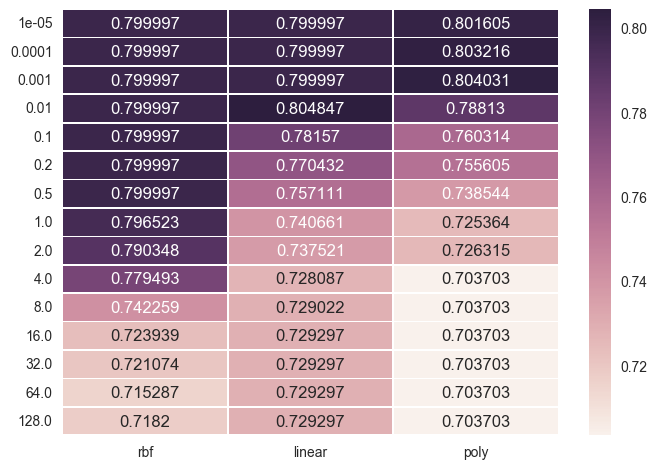

In [168]:
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
sns.heatmap(table, annot=True,fmt='g', linewidths=.5, yticklabels=row1,xticklabels=col1 )

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

The best F1 score was 0.8258. We can see it did a little bit worse than the untuned model F1. This is probably due to differences in the dataset, while doing the cross-validation. We could think the grid_search was so thorough it may have overfitted the model.

**Answer: **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.